In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ReadData 
import ProductFilter


Odoo_SalesLinesReport = ReadData.read_from_excel('SalesLinesReport.xlsx')
Odoo_SalesHeaderReport = ReadData.read_from_excel('SalesHeaderReport.xlsx')


#Union de datos de Odoo

In [218]:
Columns_SL = Odoo_SalesLinesReport.columns
Columns_SH = Odoo_SalesHeaderReport.columns

In [219]:
Odoo_SalesLinesReport = Odoo_SalesLinesReport.rename(columns={'Líneas de factura/Número': 'Número'})

In [220]:
Columns_TF = ['Fecha', 'Partner/Nombre','Divisa/ID','Equipo de ventas/ID','Líneas de factura/Fecha','Líneas de factura/Producto']

In [221]:
Odoo = Odoo_SalesLinesReport.merge(Odoo_SalesHeaderReport, how = 'left', on = 'Número')

In [222]:
Odoo_Final = pd.DataFrame(Odoo['Número'])

In [223]:
#Limpiar columnas de Oddo DataFrame 
for col in Columns_TF:
    Odoo_Final = pd.concat([Odoo_Final, Odoo[col]], axis=1)
    

In [224]:
Odoo_Final = Odoo_Final.dropna()
Odoo_Final = Odoo_Final.reset_index()

In [225]:
for j in range (len(Odoo_Final)):
    t = Odoo_Final['Líneas de factura/Producto'][j]
    val = ''  
    if ( 'FUEGO AZTECA' in t):
        t = t.replace('FUEGO AZTECA', '')
    elif ( 'FUEGO MEXIKA' in t):
        t = t.replace('FUEGO MEXIKA', '')
    elif ( 'ÁGUILA MEXIKA' in t):
        t = t.replace('ÁGUILA MEXIKA', '')
    for i in range(len(t)):
        if ((t[i]) == ']'):
            print("this" , val)
            val = val + "]"
            t = t.replace(val, '')
            Odoo_Final['Líneas de factura/Producto'][j] = t
            break
        elif  ( "]"  in t):
            val = val + t[i]

this [PT0001-1-US
this [PT0001-1-US
this [PT0003-1-US
this [PT0027-1-US
this [PT0001-1-EU
this [PT0027-1-MX
this [PT0003
this [PT0010-MX
this [PT0010-MX
this [PT0001-1-MX
this [PT0028-1-MX
this [PT0003
this [PT0004
this [PT0001-1-MX
this [PT0011-6-MX
this [PT0011-6-MX
this [PT0012-6-MX
this [PT0011-6-MX
this [PT0012-6-MX
this [PT0012-6-MX
this [PT0012-6-MX
this [PT0011-6-MX
this [PT0012-6-MX
this [PT0001-1-EU
this [PT0003-1-EU
this [PT0010-EU
this [PT0027-1-EU
this [PT0028-1-EU
this [PT0001-1-EU
this [PT0003-1-EU
this [PT0010-EU
this [PT0028-1-EU
this [PT0001-1-EU
this [PT0003-1-EU
this [PT0010-EU
this [PT0027-1-EU
this [PT0028-1-EU
this [PT0001-1-EU
this [PT0003-1-EU
this [PT0010-EU
this [PT0027-1-EU
this [PT0028-1-EU
this [PT0003
this [PT0003-2-MX
this [PT0003
this [PT0007-1-MX
this [PT0027-1-MX
this [PT0012-1-MX
this [PT0008-1-MX
this [PT0012-1-MX
this [PT0027-1-MX
this [PT0012-1-MX
this [PT0012-1-MX
this [PT0008-1-MX
this [PT0033-1-MX
this [PT0008-1-MX
this [PT0012-1-MX
this [PT000

C:\Users\sofia\AppData\Local\Temp\ipykernel_15872\1369528691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Odoo_Final['Líneas de factura/Producto'][j] = t
C:\Users\sofia\AppData\Local\Temp\ipykernel_15872\1369528691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Odoo_Final['Líneas de factura/Producto'][j] = t
C:\Users\sofia\AppData\Local\Temp\ipykernel_15872\1369528691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O

In [247]:
Odoo_Final

,index,Número,Fecha,Partner/Nombre,Divisa/ID,Equipo de ventas/ID,Líneas de factura/Fecha,Líneas de factura/Producto,Cantidad de ventas
0,0,FVE/2023/0037,2023-12-31,Cliente Amazon USA,3.0,19.0,2023-12-31,- Elíxir Ámbar,1
1,1,FVE/2023/0037,2023-12-31,Cliente Amazon USA,3.0,19.0,2023-12-31,- Elíxir Ámbar,1
2,2,FVE/2023/0037,2023-12-31,Cliente Amazon USA,3.0,19.0,2023-12-31,- Manjar Emperador,1
3,3,FVE/2023/0037,2023-12-31,Cliente Amazon USA,3.0,19.0,2023-12-31,- Nutty & Picante,1
4,4,FV/2023/0544,2023-12-31,Cliente Amazon Netherlands,1.0,2.0,2023-12-31,- Elíxir Ámbar,1
...,...,...,...,...,...,...,...,...,...
235,239,FV/2023/0442,2023-12-05,LA EUROPEA MEXICO,34.0,20.0,2023-12-05,- Nutty & Picante mini,1
236,240,FV/2023/0442,2023-12-05,LA EUROPEA MEXICO,34.0,20.0,2023-12-05,- Néctar Ígneo Mini,1
237,241,FV/2023/0442,2023-12-05,LA EUROPEA MEXICO,34.0,20.0,2023-12-05,- Elíxir Ámbar mini,1
238,242,FV/2023/0442,2023-12-05,LA EUROPEA MEXICO,34.0,20.0,2023-12-05,- Nutty & Picante,1


In [273]:
Odoo_Final['Partner/Nombre'].head(20)

0             Cliente Amazon USA
1             Cliente Amazon USA
2             Cliente Amazon USA
3             Cliente Amazon USA
4     Cliente Amazon Netherlands
5          Cliente Amazon México
6          Cliente Amazon México
7          Cliente Amazon México
8          Cliente Amazon México
9          Cliente Amazon México
10         Cliente Amazon México
11         Cliente Amazon México
12         Cliente Amazon México
13         Cliente Amazon México
14         Cliente Amazon México
15         Cliente Amazon México
16         Cliente Amazon México
17         Cliente Amazon México
18         Cliente Amazon México
19         Cliente Amazon México
Name: Partner/Nombre, dtype: object

In [274]:
Brenda = Odoo_Final.loc[Odoo_Final['Partner/Nombre'] == 'Brenda Griselda Ruiz Bolaños']
Client_USA = Odoo_Final.loc[Odoo_Final['Partner/Nombre'] == 'Cliente Amazon USA']
Cliente_Netherlands = Odoo_Final.loc[Odoo_Final['Partner/Nombre'] == 'Cliente Amazon Netherlands']
EUROPEA = Odoo_Final.loc[Odoo_Final['Partner/Nombre'] == 'LA EUROPEA MEXICO']
Client_MEX = Odoo_Final.loc[Odoo_Final['Partner/Nombre'] == 'Cliente Amazon México']

In [275]:
Client_MEX

,index,Número,Fecha,Partner/Nombre,Divisa/ID,Equipo de ventas/ID,Líneas de factura/Fecha,Líneas de factura/Producto,Cantidad de ventas
5,5,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,- Nutty & Picante,1
6,6,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,- Manjar Emperador,1
7,7,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,Pack Esencial -,1
8,8,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,Pack Esencial -,1
9,9,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,- Elíxir Ámbar,1
10,10,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,- Néctar Ígneo,1
11,11,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,- Manjar Emperador,1
12,12,FV/2023/0543,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,Servicio de envío al cliente,1
13,13,FV/2023/0542,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,Base de madera para Elíxir - v. MX,1
14,14,FV/2023/0542,2023-12-31,Cliente Amazon México,34.0,19.0,2023-12-31,- Elíxir Ámbar,1


In [276]:
df_grouped_Brenda=Brenda.groupby (['Partner/Nombre','Líneas de factura/Producto'])['Cantidad de ventas'].sum ()
df_grouped_USA=Client_USA.groupby (['Partner/Nombre','Líneas de factura/Producto'])['Cantidad de ventas'].sum ()
df_grouped_NL=Cliente_Netherlands.groupby (['Partner/Nombre','Líneas de factura/Producto'])['Cantidad de ventas'].sum ()
df_grouped_EUROPEA =  EUROPEA.groupby (['Partner/Nombre','Líneas de factura/Producto'])['Cantidad de ventas'].sum ()
df_grouped_Amazon_Mex=Client_MEX.groupby (['Partner/Nombre','Líneas de factura/Producto'])['Cantidad de ventas'].sum ()

In [269]:
df_grouped_NL

Partner/Nombre              Líneas de factura/Producto
Cliente Amazon Netherlands    - Elíxir Ámbar              1
Name: Cantidad de ventas, dtype: int64

<Axes: ylabel='Cantidad de ventas'>

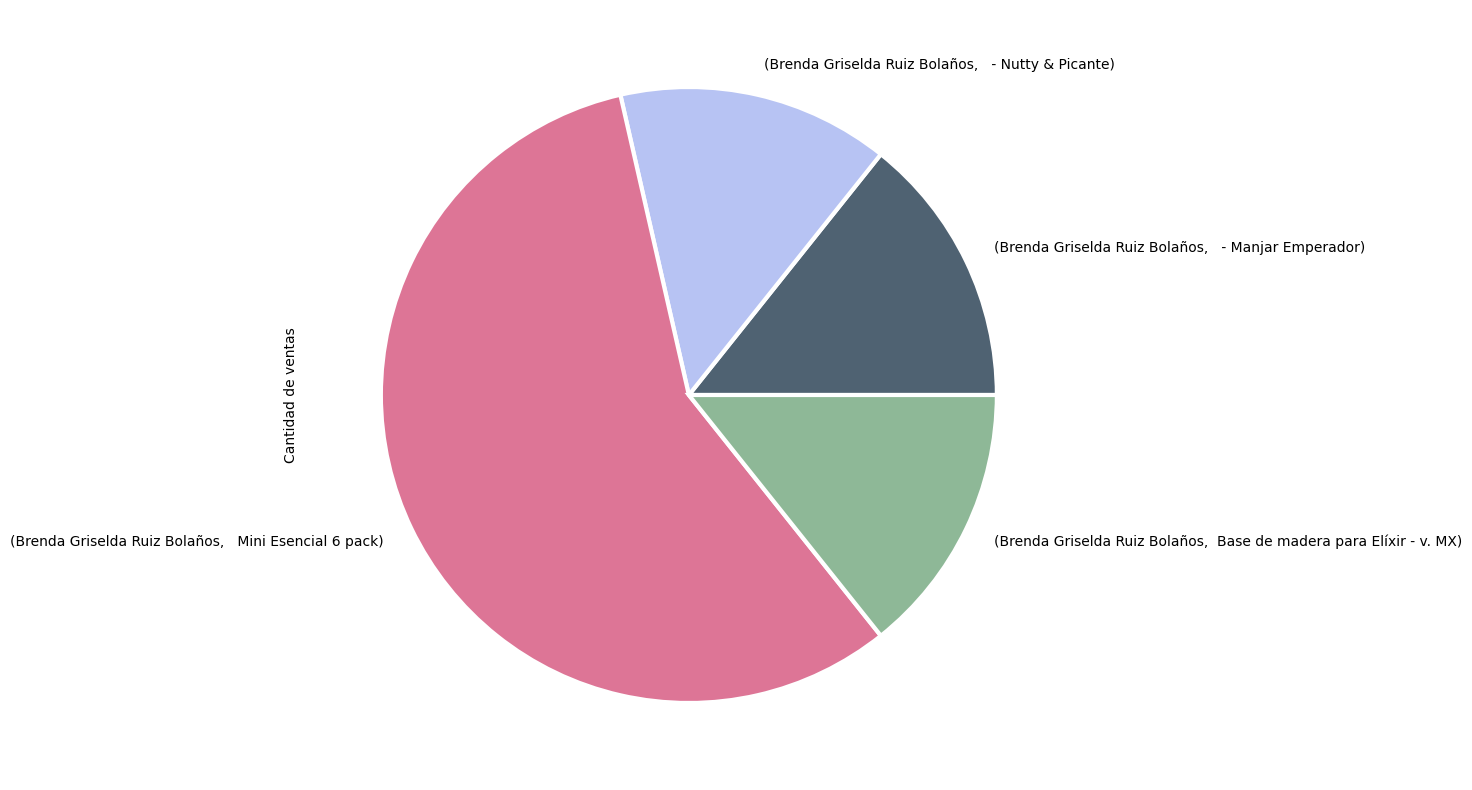

In [257]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df_grouped_Brenda.plot(kind="pie", figsize=(10,10),wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors)

<Axes: ylabel='Cantidad de ventas'>

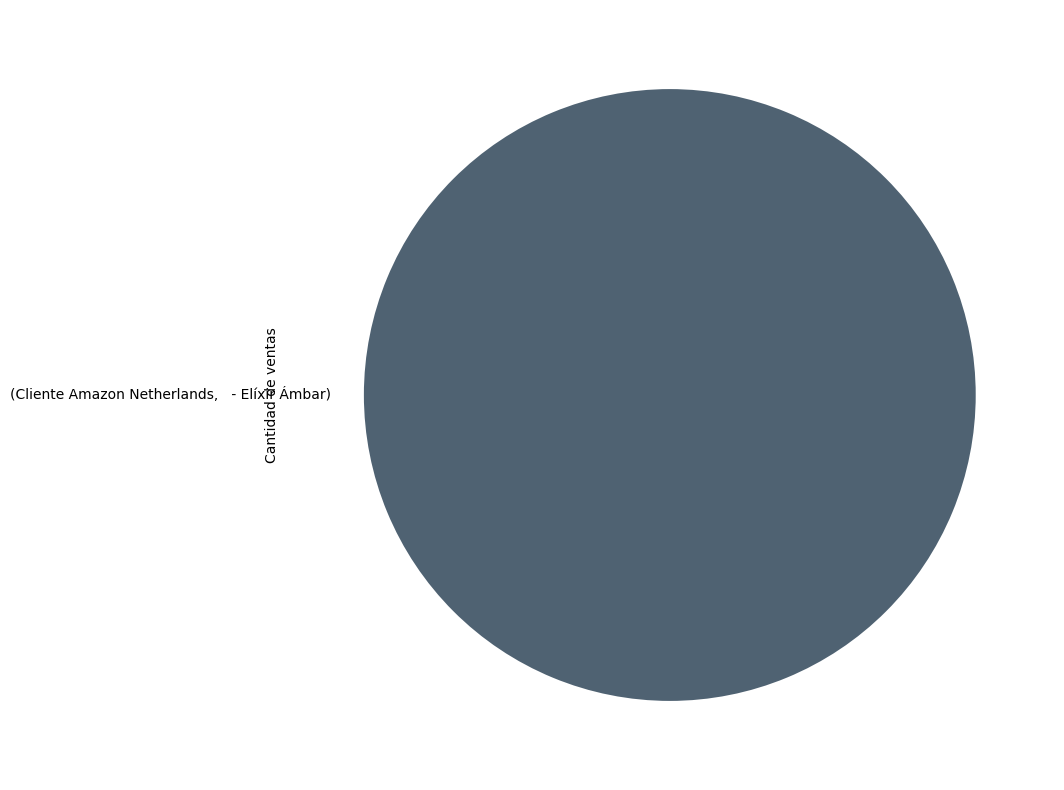

In [270]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df_grouped_NL.plot(kind="pie", figsize=(10,10),wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors)

<Axes: ylabel='Cantidad de ventas'>

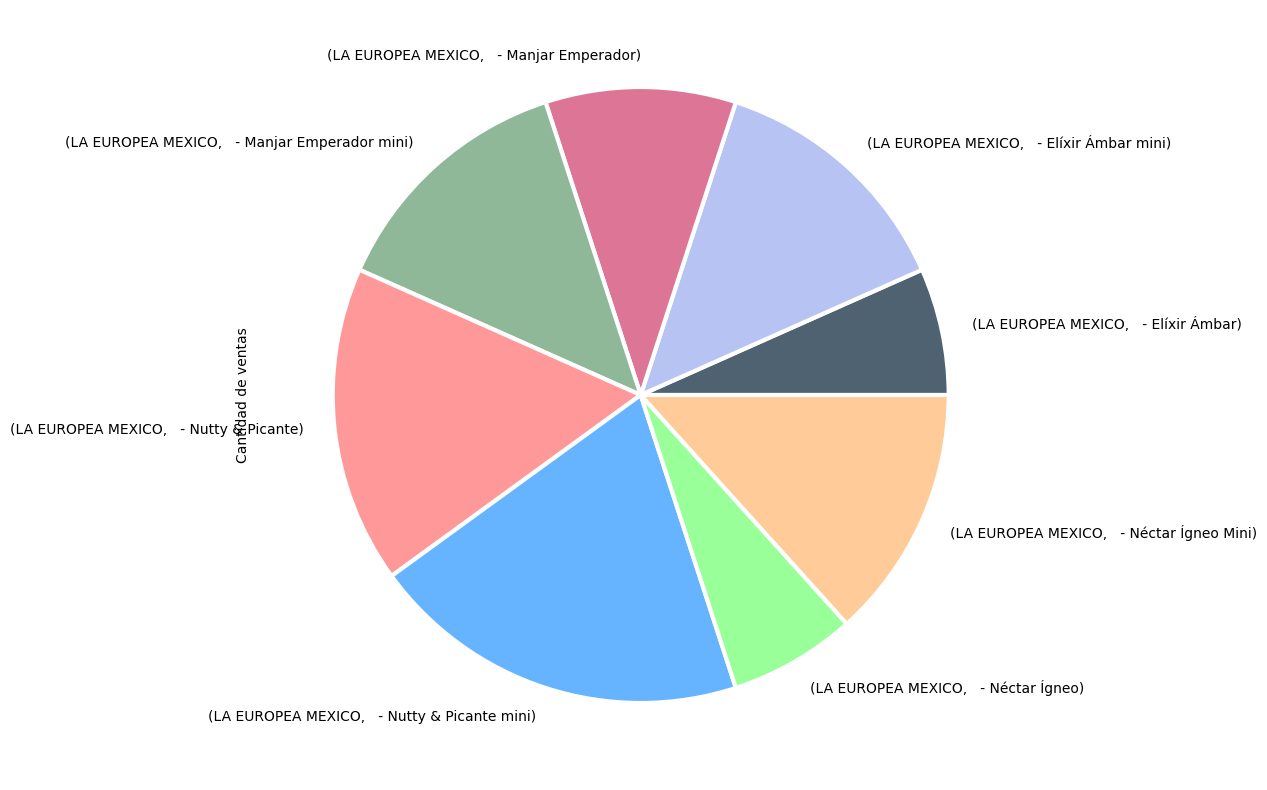

In [278]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#ff9999','#66b3ff','#99ff99','#ffcc99']
df_grouped_EUROPEA.plot(kind="pie", figsize=(10,10),wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors)

<Axes: ylabel='Cantidad de ventas'>

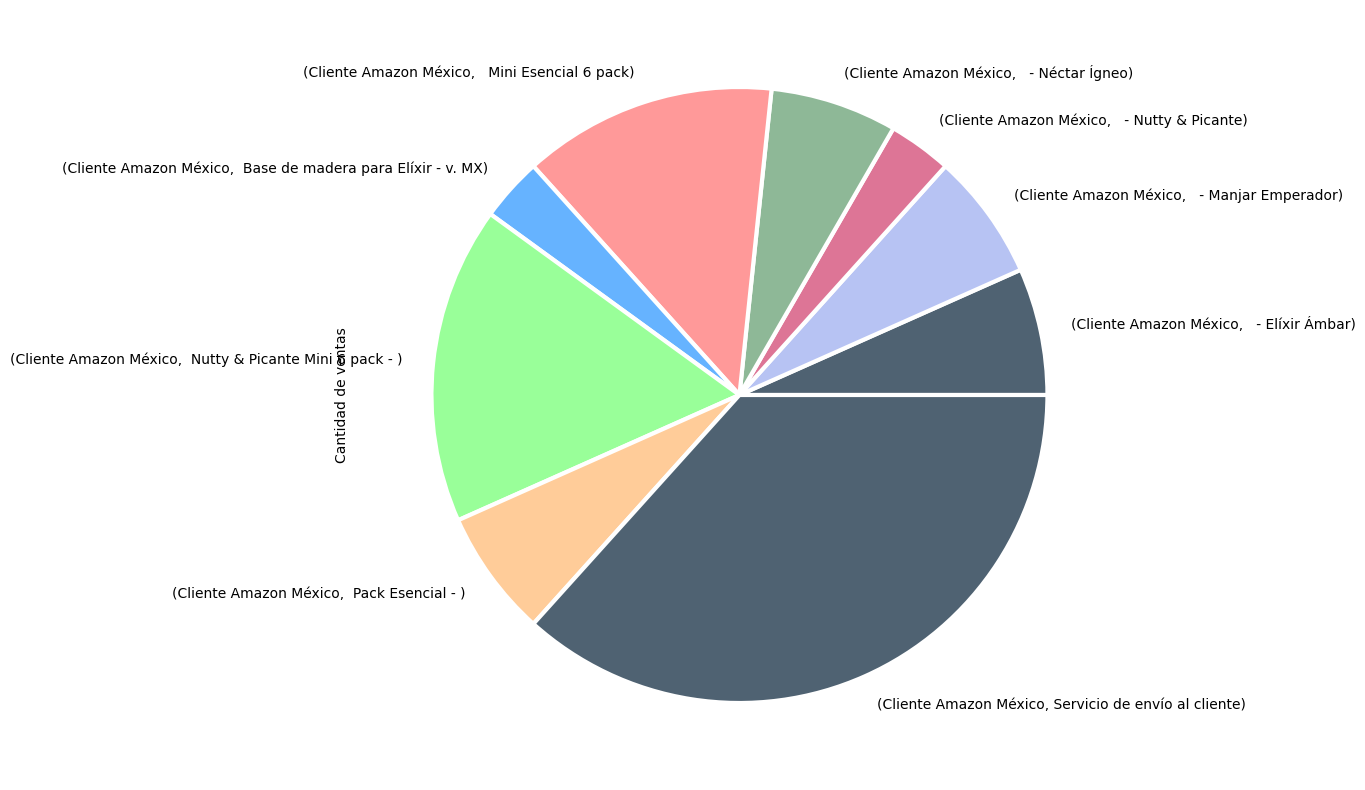

In [279]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#ff9999','#66b3ff','#99ff99','#ffcc99']
df_grouped_Amazon_Mex.plot(kind="pie", figsize=(10,10),wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors)